In [ ]:
%pip install imbalanced-learn

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

Note: you may need to restart the kernel to use updated packages.


In [84]:
df = pd.read_csv("data.csv")

In [85]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [87]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [102]:
# Identify Missing values

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

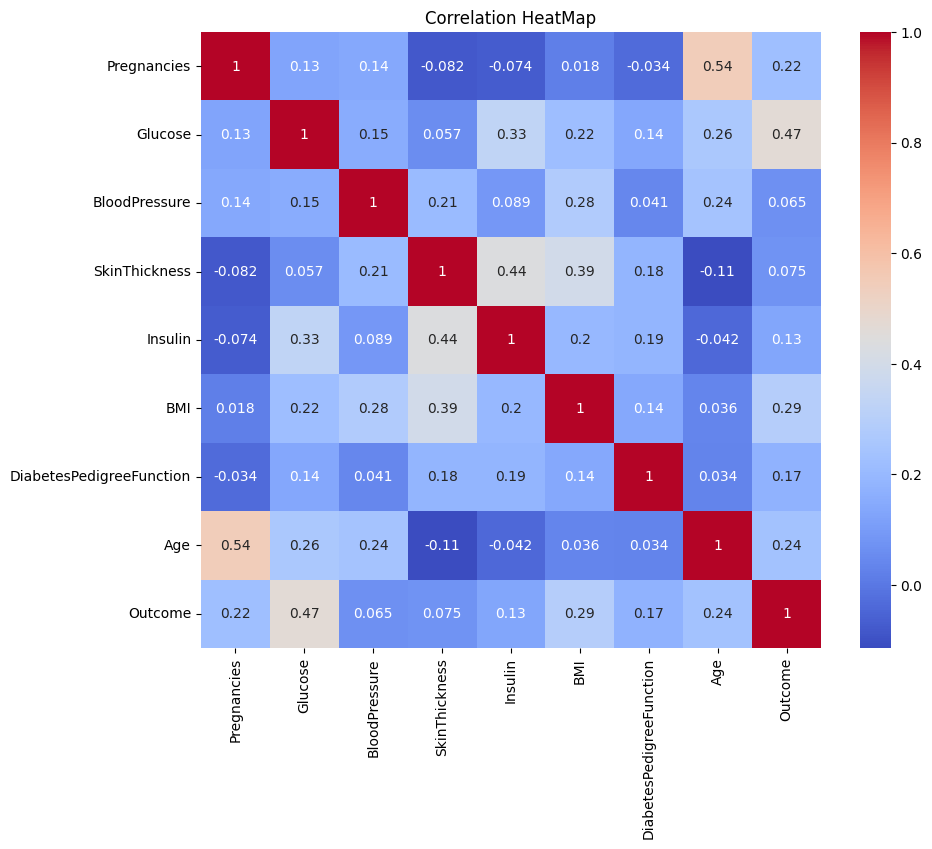

In [89]:
# Heatmap of Correlation

plt.figure(figsize= (10, 8))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
plt.title("Correlation HeatMap")
plt.show()


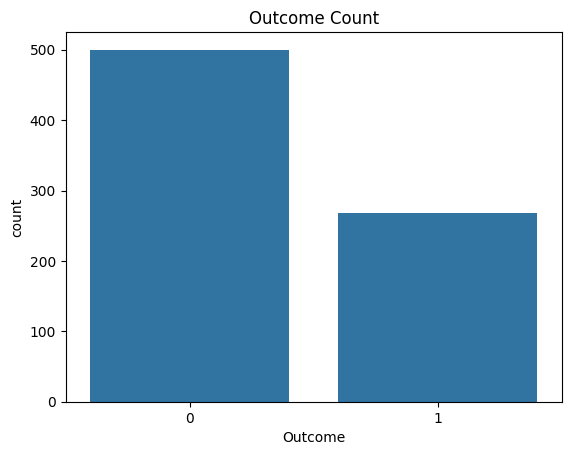

In [100]:
# Count plot for outcome

sns.countplot(data = df, x = 'Outcome')
plt.title('Outcome Count')
plt.show()

In [90]:
x = df.drop(columns=['Outcome', 'BloodPressure', 'SkinThickness'], axis = 1)
y = df[['Outcome']]

In [91]:
x.sample()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
690,8,107,0,24.6,0.856,34


In [92]:
#Replace zeros with median for relevant columns
cols_with_zero = ['Glucose','Insulin', 'BMI']
for col in cols_with_zero:
    x[col] = x[col].replace(0, x[col].median())

In [93]:
y.sample(5)

,Outcome
695,1
273,0
375,1
650,0
464,0


In [94]:
#Handle Class Imbalance with SMOTE

smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(x, y)

In [95]:
# split data for train and test

x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size= 0.2, random_state= 42)

In [96]:
# Feature Scaling

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [97]:
# Convert to DataFrame for better readability

x_train_scaled = pd.DataFrame(x_train_scaled, columns= x_train.columns, index = x_train.index)
x_test_scaled = pd.DataFrame(x_test_scaled, columns= x_test.columns, index = x_test.index)

print("Scaled Train Data:\n")

display(x_train_scaled.head(3))

print("Scaled Test Data:\n")
display(x_test_scaled.head(3))

Scaled Train Data:



,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
29,0.310294,-0.285281,-0.637937,0.156857,-0.466806,0.352029
535,0.002692,0.202935,-0.637937,-0.022683,-0.579424,-0.970559
695,0.925499,0.528412,3.586203,-0.396726,-1.139294,0.792891


Scaled Test Data:



,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
521,-0.288808,-0.120458,0.233338,-0.014542,-0.539360,-0.705144
737,1.140936,-1.973654,-0.662519,-0.205011,0.295097,0.696385
740,1.998783,-0.246098,0.413410,1.429849,0.818400,1.221958


In [98]:
# Model Training

models = {
    "LogisticRegression" : LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier()
}

results = {}

for name, model in models.items():
   model.fit(x_train_scaled, y_train)
   y_pred = model.predict(x_test_scaled)
   acc = accuracy_score(y_test, y_pred)
   print(f"{name} Accuracy: {acc * 100:.2f}%")
   print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
   print(f"Classification Report:\n{classification_report(y_test, y_pred)}\n")
   results[name] = (model, y_pred)

LogisticRegression Accuracy: 74.00%
Confusion Matrix:
[[74 25]
 [27 74]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74        99
           1       0.75      0.73      0.74       101

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.74      0.74      0.74       200


KNN Accuracy: 78.50%
Confusion Matrix:
[[74 25]
 [18 83]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        99
           1       0.77      0.82      0.79       101

    accuracy                           0.79       200
   macro avg       0.79      0.78      0.78       200
weighted avg       0.79      0.79      0.78       200


DecisionTreeClassifier Accuracy: 72.00%
Confusion Matrix:
[[77 22]
 [34 67]]
Classification Report:
              precision    recall  f1-score   support

           0

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier Accuracy: 80.00%
Confusion Matrix:
[[78 21]
 [19 82]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.80      0.81      0.80       101

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200




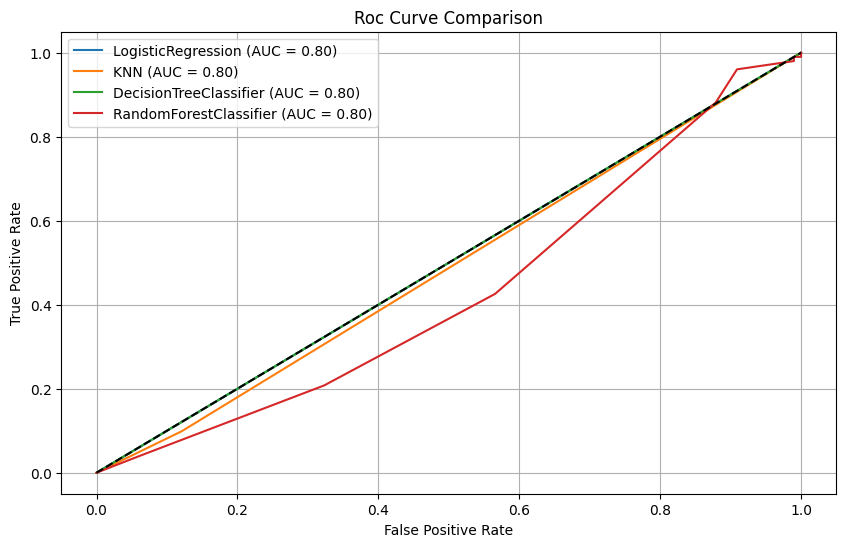

In [99]:
# Plot ROC Curves

plt.figure(figsize = (10,6))
for name, (model, _) in results.items():
    y_prob = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_pred)
    plt.plot(fpr, tpr, label = f"{name} (AUC = {auc_score:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Roc Curve Comparison")
plt.legend()
plt.grid()
plt.show()

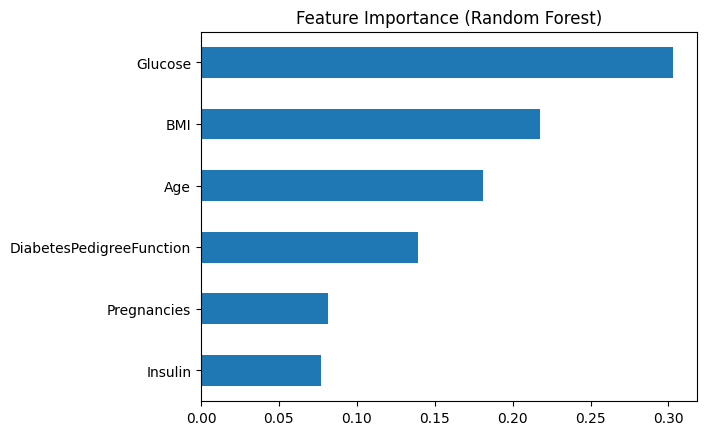

In [104]:
# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=x_train_scaled.columns)
feature_importances.sort_values(ascending=True).plot(kind='barh')
plt.title('Feature Importance (Random Forest)')
plt.show()